In [50]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [51]:
df_red = pd.read_csv('winequality-red.csv', sep=";")
df_white = pd.read_csv('winequality-white.csv', sep=";")

df_red['type'] = '1'
df_white['type'] = '0'

# Combine the two DataFrames
df_combined = pd.concat([df_red, df_white], ignore_index=True)

# Display the first few rows of the combined DataFrame
df_combined

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,0
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,0
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,0
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,0


## Predicting Wine Type

In [52]:
X = df_combined.drop('type', axis=1)
y = df_combined['type']

# Encode the target variable (if it's categorical)
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Initialize and train the model (Logistic Regression)
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{class_report}')

Accuracy: 0.9792307692307692
Confusion Matrix:
[[951   8]
 [ 19 322]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       959
           1       0.98      0.94      0.96       341

    accuracy                           0.98      1300
   macro avg       0.98      0.97      0.97      1300
weighted avg       0.98      0.98      0.98      1300



## Predicting Wine Quality

Linear Regression

In [53]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load your dataset (Assuming the dataset is a CSV file)
# df = pd.read_csv('your_wine_dataset.csv')

# Split features and target variable
X = df_combined.drop('quality', axis=1)  # Replace 'quality' with the actual column name for wine quality
y = df_combined['quality']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the model (Linear Regression)
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model using regression metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'R-squared (R²): {r2}')


Mean Squared Error (MSE): 0.5412384543695582
Mean Absolute Error (MAE): 0.5644129055666046
R-squared (R²): 0.2671574851262728


Random Forest Approach

In [54]:
# Import necessary libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Split dataset into features and target variable
X = df_combined.drop('quality', axis=1)
y = df_combined['quality']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'R-squared (R²): {r2}')


Mean Squared Error (MSE): 0.36979084615384616
Mean Absolute Error (MAE): 0.43674615384615384
R-squared (R²): 0.4992993356535784


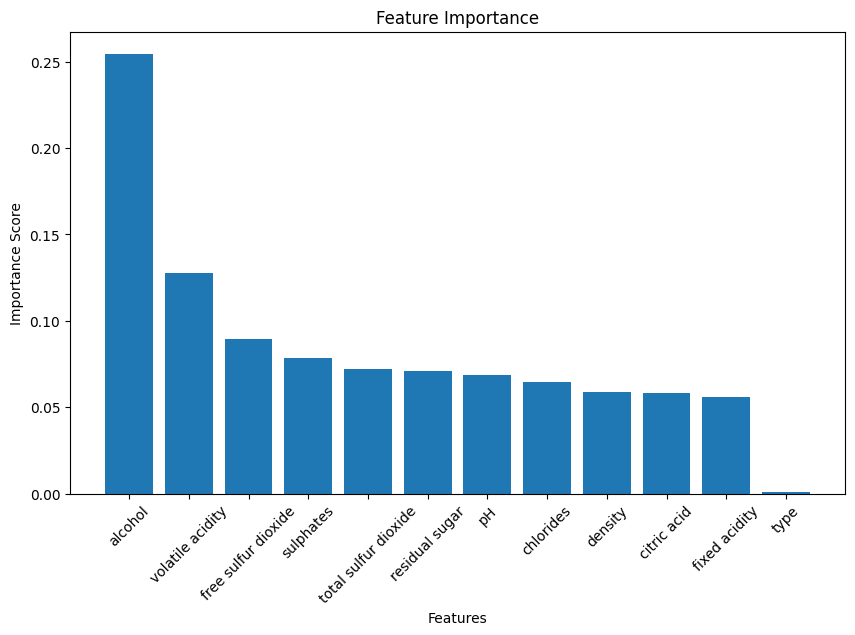

In [55]:
# For Random Forest or Gradient Boosting
import matplotlib.pyplot as plt
import pandas as pd

# Get feature importance
importance = rf_model.feature_importances_  # or gb_model.feature_importances_
features = X_train.columns

# Create a DataFrame for visualization
importance_df = pd.DataFrame({'Feature': features, 'Importance': importance}).sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.bar(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.title('Feature Importance')
plt.xticks(rotation=45)
plt.show()


XGboost

In [56]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import LabelEncoder

# Encode the 'type' column in both training and testing sets
encoder = LabelEncoder()
X_train['type'] = encoder.fit_transform(X_train['type'])
X_test['type'] = encoder.transform(X_test['type'])

# Initialize the XGBoost Regressor
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Train the model
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred = xgb_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'R-squared (R²): {r2}')


Mean Squared Error (MSE): 0.46245776199177935
Mean Absolute Error (MAE): 0.5315876228992755
R-squared (R²): 0.37382733821868896


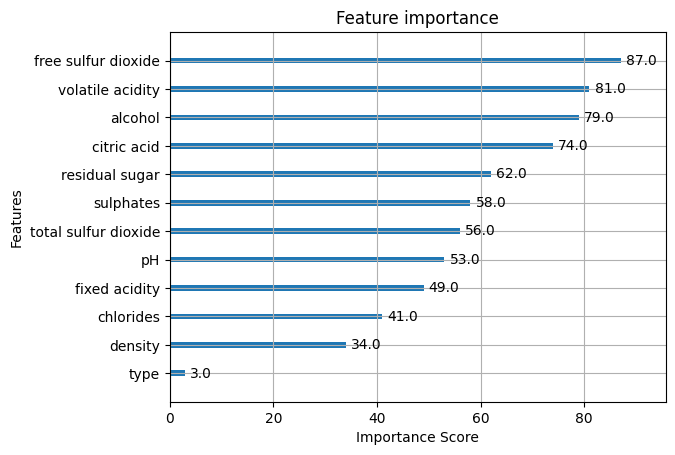

In [57]:
from xgboost import plot_importance

# Plot feature importance
plot_importance(xgb_model, importance_type='weight', xlabel='Importance Score')
plt.show()


## Feature Impact on Quality

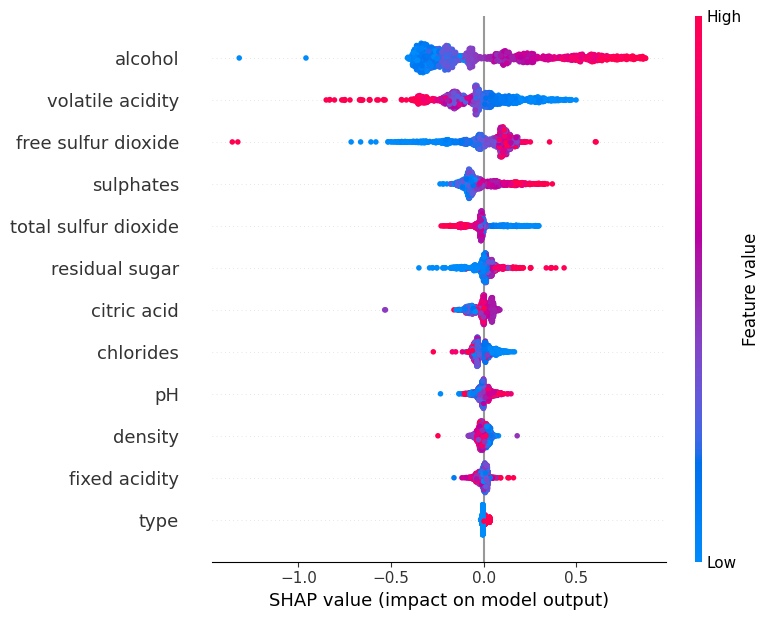

In [58]:
import shap

# Create SHAP explainer
explainer = shap.TreeExplainer(xgb_model, X_train)  # Use your trained model and data
shap_values = explainer(X_test)

# Convert shap_values to a NumPy array for compatibility
shap_values_array = shap_values.values

# SHAP summary plot: Shows the direction and magnitude of impact
shap.summary_plot(shap_values, X_test)

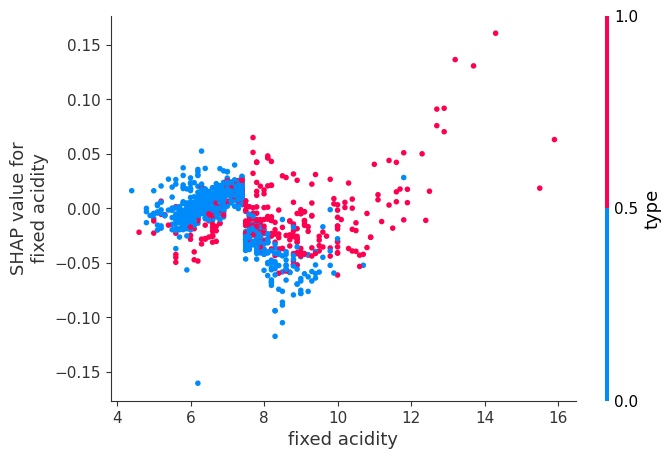

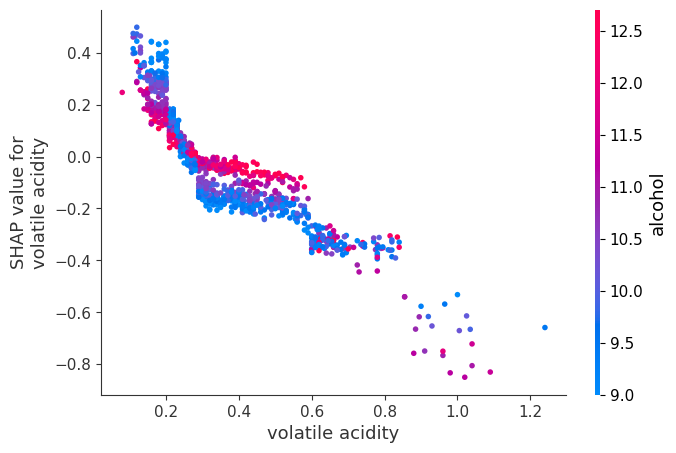

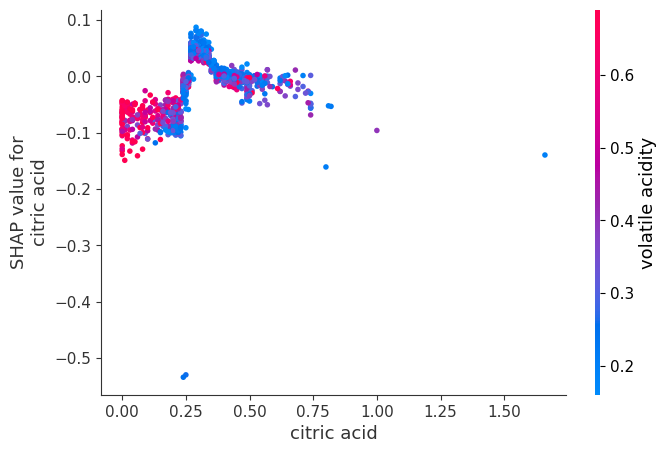

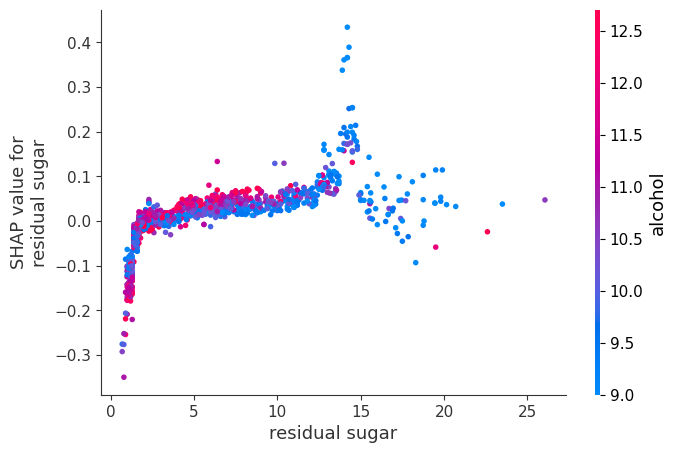

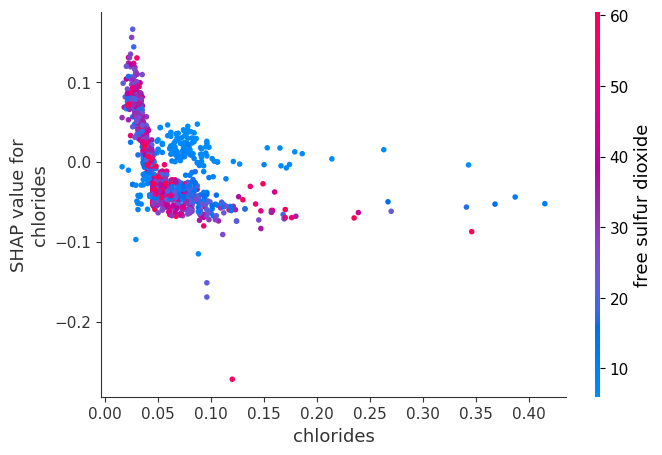

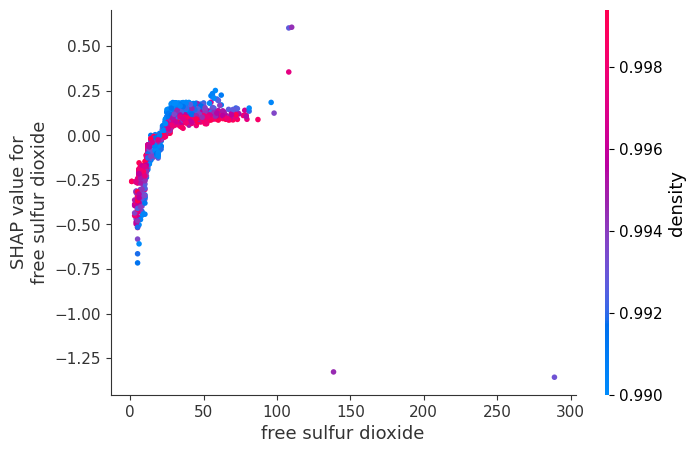

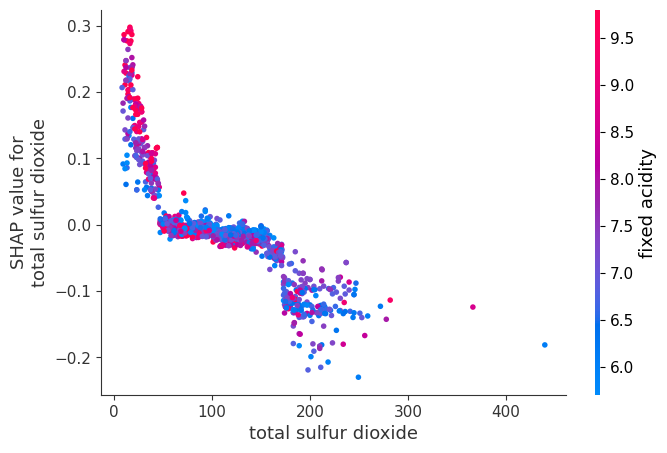

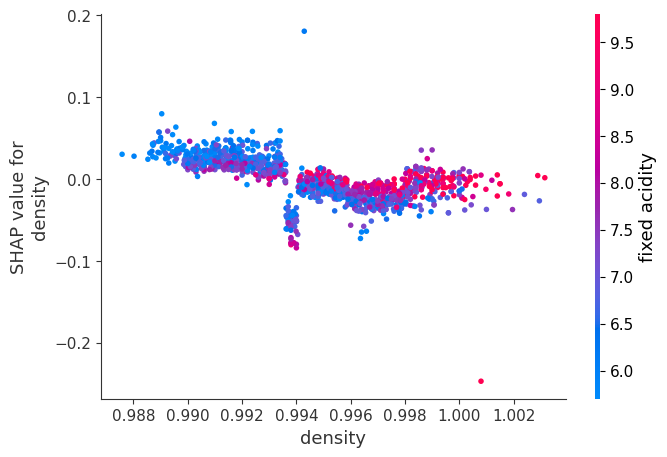

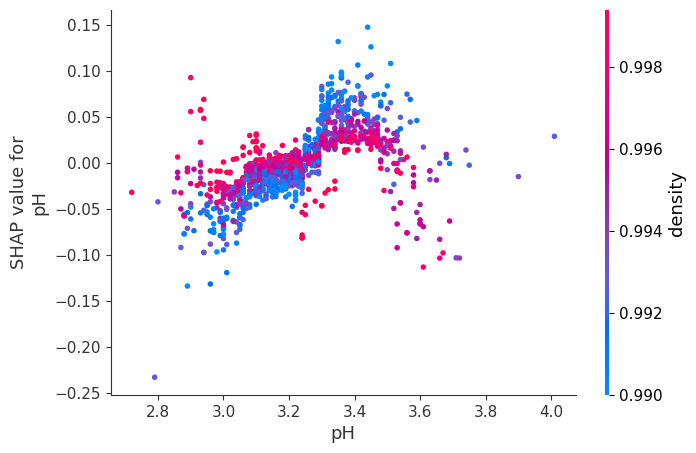

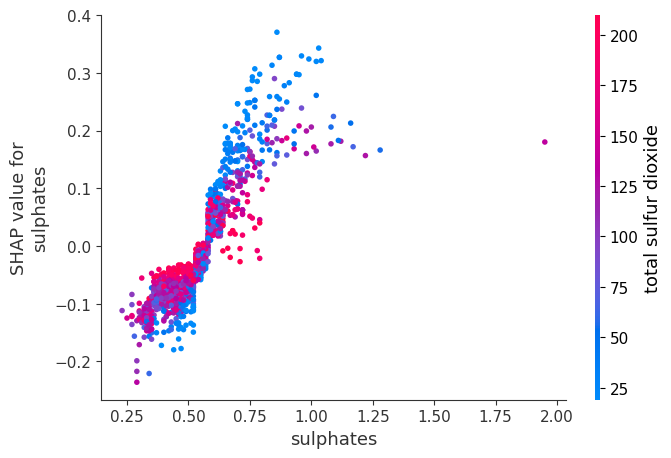

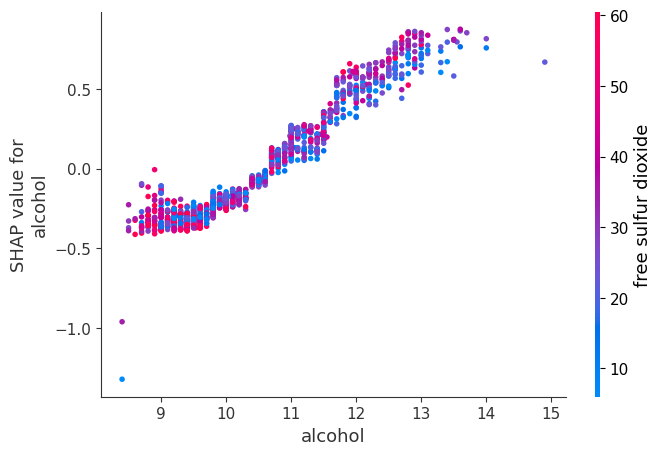

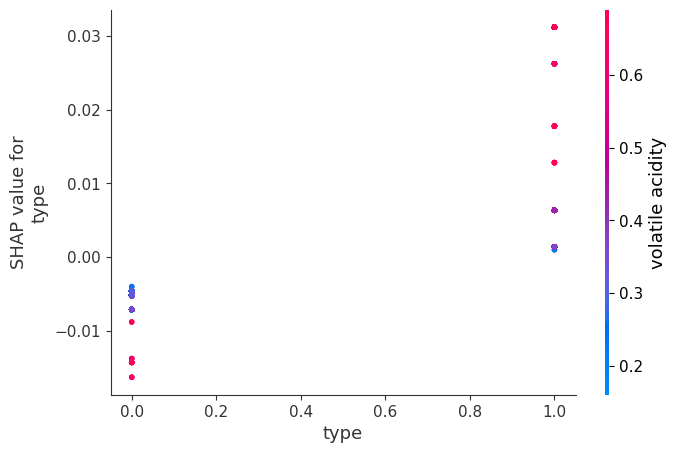

In [59]:
# Plot SHAP dependence plots for each feature
for feature in X_train.columns:
    shap.dependence_plot(feature, shap_values_array, X_test)

Partial Dependence Plots

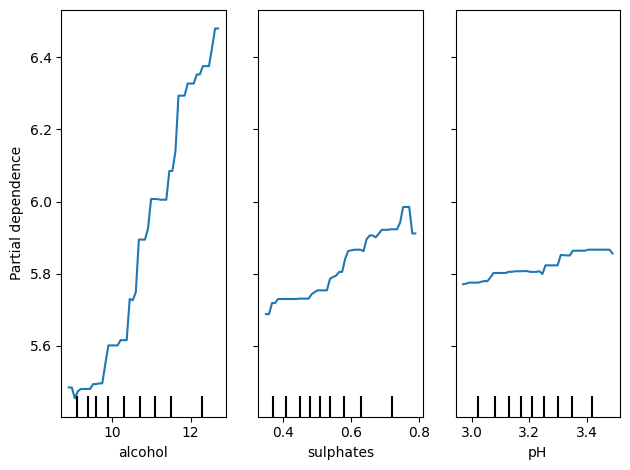

In [60]:
from sklearn.inspection import PartialDependenceDisplay
import matplotlib.pyplot as plt

# Plot partial dependence for single or multiple features
PartialDependenceDisplay.from_estimator(xgb_model, X_train, ['alcohol', 'sulphates', 'pH'], grid_resolution=50)

# Customize plot
plt.tight_layout()
plt.show()


Correlations

In [61]:
correlations = df_combined.corr()['quality'].sort_values(ascending=False)
print(correlations)


quality                 1.000000
alcohol                 0.444319
citric acid             0.085532
free sulfur dioxide     0.055463
sulphates               0.038485
pH                      0.019506
residual sugar         -0.036980
total sulfur dioxide   -0.041385
fixed acidity          -0.076743
type                   -0.119323
chlorides              -0.200666
volatile acidity       -0.265699
density                -0.305858
Name: quality, dtype: float64
